In [2]:
# 필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['axes.unicode_minus'] = False

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
# print(cancer)

# random_state -> 일종의 hyper파라미터가 될 수 있다 -> 랜덤으로 뽑아서 질문지를 만들기 때문에
# 랜덤값이 고정되지 않으면 실행할 때 마다 값이 달라질 수 있다
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
print(X_train.size)
print(X_train[0].size)
print(y_train.size)

12780
30
426


In [14]:
# 복잡도 조정 방법 2가지
# 1. 사전가지치기 -> leaf의 개수를 조정 # sklearn은 사전가지치기만 지원
# 2. 사후가지치기 -> 노드 생성 후 노드를 병합하는 것
# 의사결정트리에 랜덤값이 들어가는 이유 : 사용할 특성들을 랜덤으로 추출
# feature가 100개라고 100개를 다 쓸 수 없기 때문
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# 훈련 세트 정확도 : 1.000 -> 모든 노드가 순수노드가 된 상태 -> 과적합 상태
# 테스트 세트 정확도 : 0.930
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.930


In [15]:
# 결정트리의 깊이를 제한하지 않으면 트리가 무한정 깊어질 수 있다.
# 사전 가지치기 작업 (death의 최대 크기를 정하는 작업)을 통해 복잡도를 조절한다.


tree_depth_4 = DecisionTreeClassifier(random_state=0, max_depth=4)
tree_depth_4.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(tree_depth_4.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree_depth_4.score(X_test, y_test)))

훈련 세트 정확도 : 0.995
테스트 세트 정확도 : 0.951


In [22]:
# 0은 상요하지 않음
# 값이 높을 수록 중요한 특성
# decision특성의 중요도는 신뢰하면 안된다 -> 랜덤으로 특성을 추출하기 때문에
print("특성 중요도 :\n{}".format(tree.feature_importances_))

특성 중요도 :
[0.         0.         0.         0.         0.         0.
 0.         0.72468105 0.         0.         0.01277192 0.
 0.         0.         0.00826156 0.         0.         0.01702539
 0.         0.         0.05899273 0.12550655 0.00838371 0.03452044
 0.00985664 0.         0.         0.         0.         0.        ]


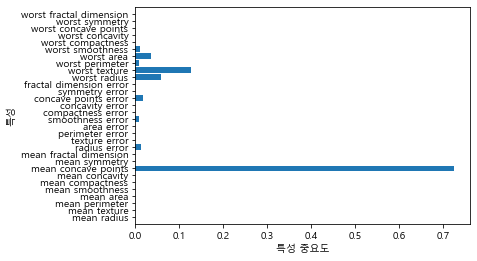

In [23]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

In [24]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


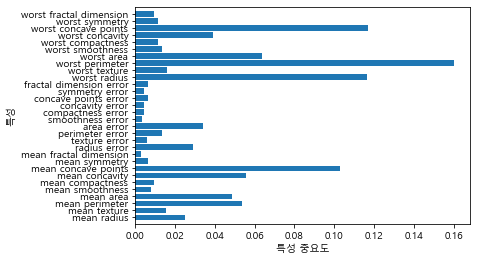

In [31]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)